In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.validation import column_or_1d 

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1 = df.drop(["Name", "Ticket", "SibSp","Parch", "Cabin", "Embarked"], axis="columns")
df1 = df1.set_index("PassengerId")
df2 = df_test.drop(["Name", "Ticket","SibSp","Parch", "Cabin", "Embarked"], axis="columns")
df2 = df2.set_index("PassengerId")
df1.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.0,7.2500
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.9250
4,1,1,female,35.0,53.1000
5,0,3,male,35.0,8.0500


In [5]:
df1.columns[df1.isna().any()]

Index(['Age'], dtype='object')

In [6]:
df1["Age"]=df1["Age"].fillna(df1["Age"].mean())
df1.head(10)


,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.000000,7.2500
2,1,1,female,38.000000,71.2833
3,1,3,female,26.000000,7.9250
4,1,1,female,35.000000,53.1000
5,0,3,male,35.000000,8.0500
6,0,3,male,29.699118,8.4583
7,0,1,male,54.000000,51.8625
8,0,3,male,2.000000,21.0750
9,1,3,female,27.000000,11.1333


In [7]:
df2.columns[df2.isna().any()]

Index(['Age', 'Fare'], dtype='object')

In [8]:
df2["Age"]=df2["Age"].fillna(df2["Age"].mean())
df2["Fare"]= df2["Fare"].fillna(method='ffill')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
df1["Sex"] = le.fit_transform(df1["Sex"])
df2["Sex"] = le.fit_transform(df2["Sex"])
df1.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,1,22.0,7.2500
2,1,1,0,38.0,71.2833
3,1,3,0,26.0,7.9250
4,1,1,0,35.0,53.1000
5,0,3,1,35.0,8.0500


<AxesSubplot:>

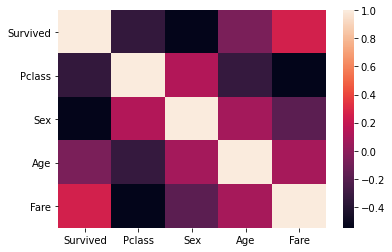

In [11]:
cor = df1[df1.columns].corr()
sns.heatmap(cor)


In [12]:
X_train = df1.drop(["Survived"], axis=1)
y_train = df1["Survived"]
X_test = df2
X_train.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
1,3,1,22.0,7.2500
2,1,0,38.0,71.2833
3,3,0,26.0,7.9250
4,1,0,35.0,53.1000
5,3,1,35.0,8.0500


In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [14]:
lr.fit(X_train, y_train)


LogisticRegression()

In [15]:
lr.score(X_train, y_train)

0.8002244668911336

In [16]:
y_predicted1 = lr.predict(X_test)
df2["Survived"] = y_predicted1.reshape(-1,1)
df2.head()

,Pclass,Sex,Age,Fare,Survived
PassengerId,,,,,
892,3,1,34.5,7.8292,0
893,3,0,47.0,7.0000,0
894,2,1,62.0,9.6875,0
895,3,1,27.0,8.6625,0
896,3,0,22.0,12.2875,1
